Importing Libraries

In [1]:
# important package
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

Importing Dataset

In [2]:
raw_df = pd.read_csv("Titanic.csv")              # to import .csv file

In [3]:
df = raw_df.copy()

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are Nan or missing values in dataset

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Filling and removing null values in Training dataset

In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Cabin'].fillna(df['Cabin'].mode().values[0],inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [9]:
df['Embarked'].fillna(df['Embarked'].mode().values[0],inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Removing Inessential Columns which doesn't have ststistical data .

In [10]:
df=df.drop(columns=['Name'],axis=1)
df=df.drop(columns=['Ticket'],axis=1)
df=df.drop(columns=['Cabin'],axis=1)
df=df.drop(columns=['PassengerId'],axis=1)


In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Now Lable Encoding some Columns like "Sex" and "Embarked"

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
df['Embarked']=encoder.fit_transform(df['Embarked'])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [13]:
df.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [14]:
df.Embarked.value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

<AxesSubplot:>

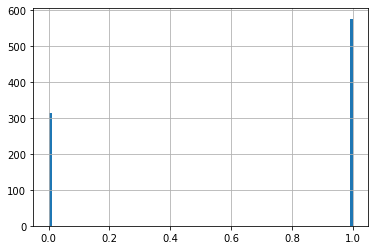

In [15]:
df.Sex.hist(bins=100)

<AxesSubplot:>

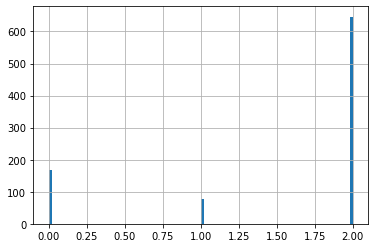

In [16]:
df.Embarked.hist(bins=100)

In [17]:
df=df.drop(columns=['Embarked'],axis=1)

In [18]:
import matplotlib.pyplot as plt
from matplotlib import style

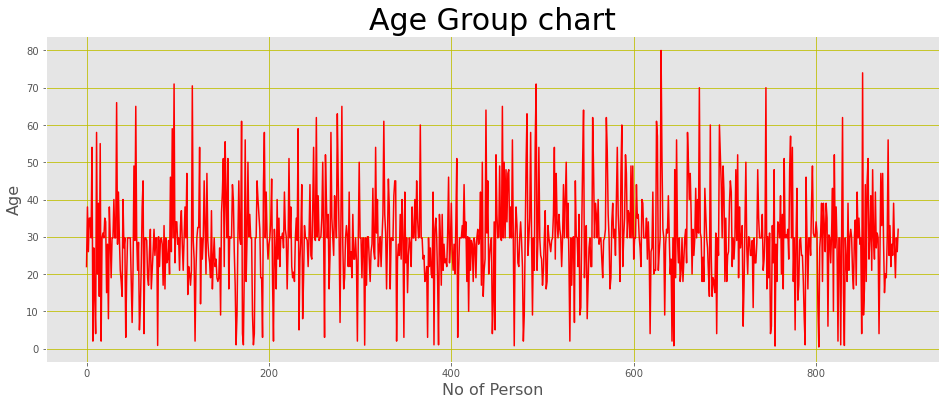

In [19]:
plt.figure(figsize=(16,6))
style.use("ggplot")
plt.plot(df['Age'],color='r')
plt.xlabel("No of Person",fontsize=16)
plt.ylabel("Age",fontsize=16)
plt.title("Age Group chart",fontsize=30)
plt.grid(True,color="y")
plt.show()

In [20]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000


<AxesSubplot:>

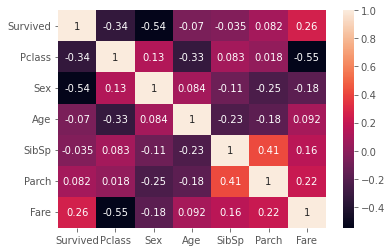

In [21]:
# Calculate correlations
corr = df.corr()
 
# Heatmap
sns.heatmap(corr,  annot=True)

In [22]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

C:\Users\RoshanV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RoshanV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RoshanV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


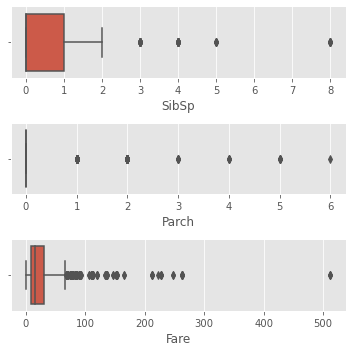

In [23]:
# Outlier Analysis

fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['SibSp'], ax = axs[0])
plt2 = sns.boxplot(df['Parch'], ax = axs[1])
plt3 = sns.boxplot(df['Fare'], ax = axs[2])
plt.tight_layout()

In [24]:
# Calculating Z-Score


mean = np.mean(df.SibSp)
std = np.std(df.SibSp)
threshold = 3
outlier = []
for i in df.SibSp:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)
print('Total numbers of outliers in "SibSp" = ',len(outlier))


outlier in dataset is [4, 4, 5, 4, 5, 4, 8, 4, 4, 8, 4, 8, 4, 4, 4, 4, 8, 5, 5, 4, 4, 5, 4, 4, 8, 4, 4, 8, 4, 8]
Total numbers of outliers in "SibSp" =  30


In [25]:
mean = np.mean(df.Parch)
std = np.std(df.Parch)
threshold = 3
outlier = []
for i in df.Parch:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)
print('Total numbers of outliers in "Parch" = ',len(outlier))

outlier in dataset is [5, 5, 3, 4, 4, 3, 4, 4, 5, 5, 6, 3, 3, 3, 5]
Total numbers of outliers in "Parch" =  15


In [26]:
mean = np.mean(df.Fare)
std = np.std(df.Fare)
threshold = 3
outlier = []
for i in df.Fare:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)
print('Total numbers of outliers in "Fare" = ',len(outlier))

outlier in dataset is [263.0, 263.0, 247.5208, 512.3292, 247.5208, 262.375, 263.0, 211.5, 227.525, 263.0, 221.7792, 227.525, 512.3292, 211.3375, 227.525, 227.525, 211.3375, 512.3292, 262.375, 211.3375]
Total numbers of outliers in "Fare" =  20


In [27]:
import scipy.stats as stats

In [28]:
#find absolute value of z-score for each observation
z = np.abs(stats.zscore(df))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
data_clean = df[(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(820, 7)

In [29]:
z

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.789272,0.827377,0.737695,0.592481,0.432793,0.473674,0.502445
1,1.266990,1.566107,1.355574,0.638789,0.432793,0.473674,0.786845
2,1.266990,0.827377,1.355574,0.284663,0.474545,0.473674,0.488854
3,1.266990,1.566107,1.355574,0.407926,0.432793,0.473674,0.420730
4,0.789272,0.827377,0.737695,0.407926,0.474545,0.473674,0.486337
...,...,...,...,...,...,...,...
886,0.789272,0.369365,0.737695,0.207709,0.474545,0.473674,0.386671
887,1.266990,1.566107,1.355574,0.823344,0.474545,0.473674,0.044381
888,0.789272,0.827377,1.355574,0.000000,0.432793,2.008933,0.176263
889,1.266990,1.566107,0.737695,0.284663,0.474545,0.473674,0.044381


In [30]:
data_clean

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


In [31]:
data_clean.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
dtype: float64

C:\Users\RoshanV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


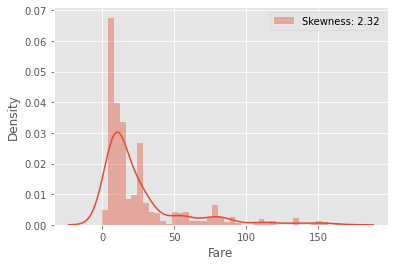

In [32]:
t=sns.distplot(data_clean["Fare"],label="Skewness: %.2f"%(data_clean["Fare"].skew()) )
t.legend()

C:\Users\RoshanV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


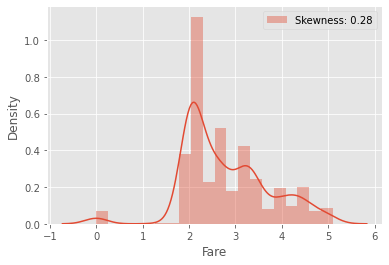

In [33]:
Log_Fare = data_clean["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(Log_Fare,label="Skewness: %.2f"%(Log_Fare.skew()) )
t.legend()

C:\Users\RoshanV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


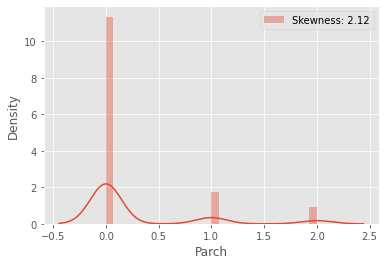

In [34]:
t=sns.distplot(data_clean["Parch"],label="Skewness: %.2f"%(data_clean["Parch"].skew()) )
t.legend()

C:\Users\RoshanV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


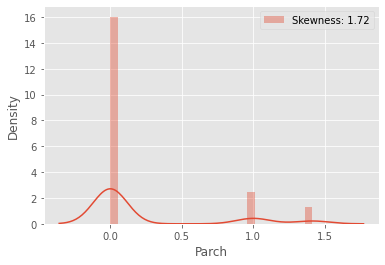

In [35]:
Sqrt_Parch = data_clean["Parch"].map(lambda i: np.sqrt(i))
t=sns.distplot(Sqrt_Parch,label="Skewness: %.2f"%(Sqrt_Parch.skew()) )
t.legend()

C:\Users\RoshanV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


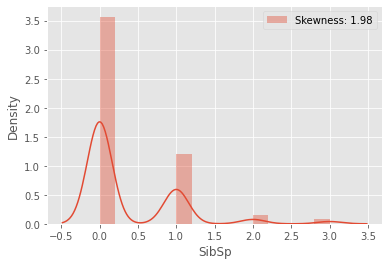

In [36]:
t=sns.distplot(data_clean["SibSp"],label="Skewness: %.2f"%(data_clean["SibSp"].skew()) )
t.legend()

C:\Users\RoshanV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


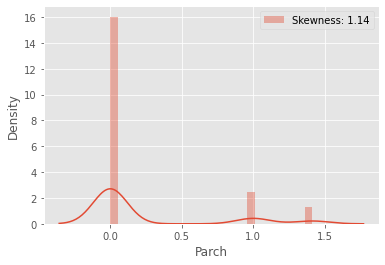

In [37]:
Sqrt_SibSp = data_clean["SibSp"].map(lambda i: np.sqrt(i))
t=sns.distplot(Sqrt_Parch,label="Skewness: %.2f"%(Sqrt_SibSp.skew()) )
t.legend()

In [38]:
data_clean

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


In [39]:
data_clean['Fare']=Log_Fare

C:\Users\RoshanV\AppData\Local\Temp/ipykernel_18552/2973185116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Fare']=Log_Fare


In [40]:
data_clean['Parch']=Sqrt_Parch
data_clean['SibSp']=Sqrt_SibSp

C:\Users\RoshanV\AppData\Local\Temp/ipykernel_18552/2024921115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Parch']=Sqrt_Parch
C:\Users\RoshanV\AppData\Local\Temp/ipykernel_18552/2024921115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['SibSp']=Sqrt_SibSp


In [41]:
data_clean.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.136758
Parch       1.723351
Fare        0.281306
dtype: float64

In [42]:
data_clean.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

# Modelling

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from  sklearn.metrics  import accuracy_score
from sklearn.metrics import confusion_matrix


In [44]:
y = data_clean['Survived']
x = data_clean.drop(['Survived'], axis=1).values
x_features = data_clean.iloc[:,1:]

#split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [45]:
x

array([[ 3.        ,  1.        , 22.        ,  1.        ,  0.        ,
         1.98100147],
       [ 1.        ,  0.        , 38.        ,  1.        ,  0.        ,
         4.26666208],
       [ 3.        ,  0.        , 26.        ,  0.        ,  0.        ,
         2.07002232],
       ...,
       [ 3.        ,  0.        , 29.69911765,  1.        ,  1.41421356,
         3.15487049],
       [ 1.        ,  1.        , 26.        ,  0.        ,  0.        ,
         3.40119738],
       [ 3.        ,  1.        , 32.        ,  0.        ,  0.        ,
         2.04769284]])

In [46]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

# Decision tree classifier

In [47]:
#train the decision tree classifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
#predicting the y values from the test data
y_pred = dt.predict(x_test)

In [49]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.7560975609756098


In [50]:
#comparision of Actual and Predicted values
res = pd.DataFrame(list(zip(y_test, y_pred)), columns =['Actual', 'Predicted']) 
res.head(100)

,Actual,Predicted
0,0,1
1,0,1
2,1,1
3,0,0
4,1,1
...,...,...
95,0,0
96,1,1
97,0,0
98,0,0


array([[84, 19],
       [21, 40]], dtype=int64)

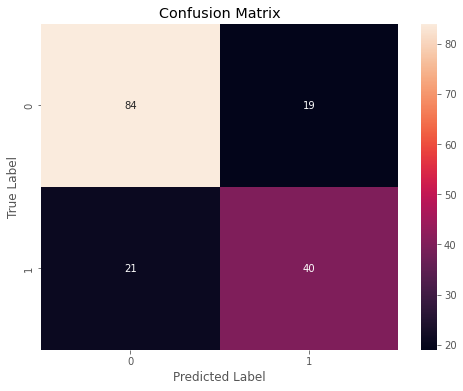

In [51]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,cbar=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
conf_matrix

In [52]:
### R-squared ###

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.04408721948113947

In [53]:
### RMSE ###

from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.4938647983247948


# Linear Regression

In [54]:
y = data_clean['Survived']
x = data_clean.drop(['Survived'], axis=1).values
x_features = data_clean.iloc[:,1:]

#split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test , y_test)

0.4071778435461624

array([[84, 19],
       [21, 40]], dtype=int64)

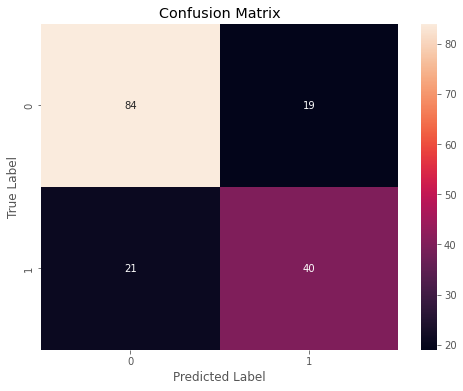

In [56]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,cbar=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
conf_matrix

#  Support Vector Classifier Algorithm

In [57]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Support Vector Classifier: " + str(accuracy_svc * 100))

Support Vector Classifier: 81.09756097560977


# Random forest Algorithm

In [58]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(x_train, y_train)
y_pred_ranfor = ranfor.predict(x_test)
accuracy_ranfor = accuracy_score(y_test, y_pred_ranfor)
print("Random Forest: " + str(accuracy_ranfor * 100))

Random Forest: 80.48780487804879


# Naive Bayes Algorithm

In [59]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes: " + str(accuracy_nb * 100))

Naive Bayes: 77.4390243902439


# K nearest neighbors Algorithm

In [60]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K Nearest neighbors: " + str(accuracy_knn * 100))

K Nearest neighbors: 73.78048780487805


# Logistic Regression Algorithm

In [61]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(x_train, y_train)
y_pred_logreg = logreg.predict(x_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression: " + str(accuracy_logreg * 100))

Logistic Regression: 82.3170731707317
